In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import os
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('zx.us.txt')

In [237]:
data = data[['Date', 'Close']]
data=data.set_index(data.Date)
# data=data.drop("Date",axis=1)
data.index = pd.DatetimeIndex(data.index)
# data=data['2010-01-01':]
# data= data['Close']
# data.head()
# ts=data
data.head()
y=data
data.head()

,Date,Close
Date,,
2011-05-16,2011-05-16,6.2119
2011-05-17,2011-05-17,5.9555
2011-05-18,2011-05-18,5.9950
2011-05-19,2011-05-19,5.9654
2011-05-20,2011-05-20,5.9260


In [238]:
y = data['Close'].resample('MS').mean()

In [239]:
# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())
print(y)


Date
2011-05-01    5.922391
2011-06-01    4.780395
2011-07-01    5.476335
2011-08-01    5.160730
2011-09-01    4.424057
2011-10-01    4.446867
2011-11-01    4.353638
2011-12-01    3.216405
2012-01-01    3.489260
2012-02-01    3.759145
2012-03-01    3.681245
2012-04-01    3.723500
2012-05-01    3.338636
2012-06-01    2.735238
2012-07-01    2.422381
2012-08-01    2.834348
2012-09-01    3.125263
2012-10-01    2.989048
2012-11-01    2.874762
2012-12-01    2.862000
2013-01-01    3.607619
2013-02-01    3.736316
2013-03-01    3.203500
2013-04-01    2.974545
2013-05-01    2.895000
2013-06-01    2.636500
2013-07-01    2.492273
2013-08-01    2.930455
2013-09-01    3.421500
2013-10-01    3.830455
                ...   
2015-06-01    1.240909
2015-07-01    0.889545
2015-08-01    0.963333
2015-09-01    1.037619
2015-10-01    0.955455
2015-11-01    0.831000
2015-12-01    0.752109
2016-01-01    0.679022
2016-02-01    0.721081
2016-03-01    1.072259
2016-04-01    1.060971
2016-05-01    0.950756
2016-0

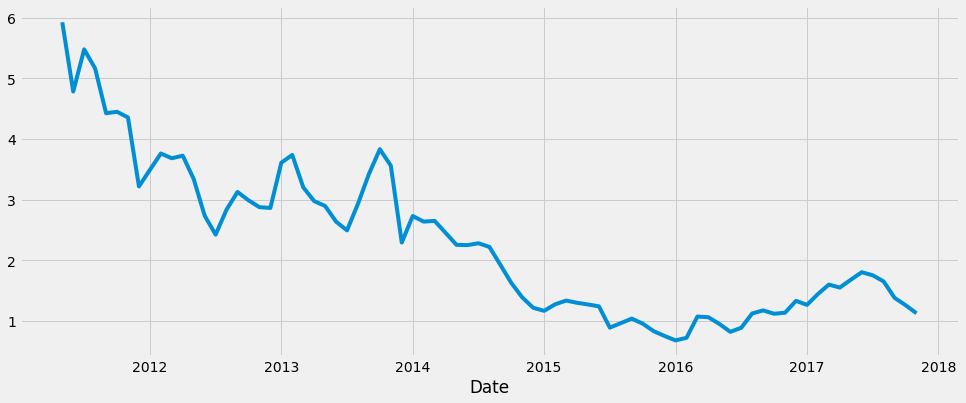

In [240]:
y.plot(figsize=(15, 6))
plt.show()

In [241]:
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [242]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:368.2574018692031
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:237.3224596846772
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:187.60118069513487
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:137.77057326163347
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:144.98149761973562
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:115.41062190590439
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:139.16975080933406
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:136.35250301130284
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:268.5209524193592
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:159.86868187951546
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:120.6209781127436
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:86.99327724447754
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:86.4083594892354
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:56.934611352522865
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:88.18631494925995
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:86.12430326606686
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:45.85661957837629
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:17.715493496307165
AR

In [243]:
# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:582.7007273660271
# lowerst AIC

In [244]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1906      0.590     -0.323      0.747      -1.347       0.966
ma.L1          0.4321      0.538      0.802      0.422      -0.623       1.487
ar.S.L12      -0.3865      0.087     -4.447      0.000      -0.557      -0.216
ma.S.L12      -0.1307      0.157     -0.831      0.406      -0.439       0.178
sigma2         0.0854      0.018      4.639      0.000       0.049       0.121


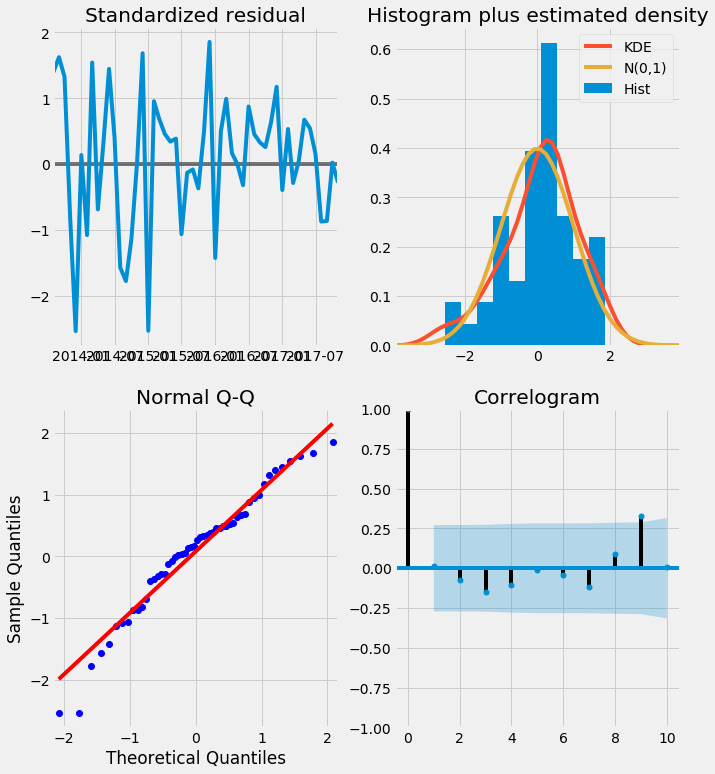

In [245]:
results.plot_diagnostics(figsize=(10, 12))
plt.show()

In [246]:
#predictions
pred = results.get_prediction(start=pd.to_datetime('2017-04-01'), dynamic=False)
pred_ci = pred.conf_int()
kyle= pred_ci.iloc[:]
kyle.head()

,lower Close,upper Close
Date,,
2017-04-01,0.962324,2.107532
2017-05-01,0.907977,2.053185
2017-06-01,1.071603,2.216811
2017-07-01,1.134425,2.279633
2017-08-01,1.332844,2.478051


In [247]:
pred_ci

,lower Close,upper Close
Date,,
2017-04-01,0.962324,2.107532
2017-05-01,0.907977,2.053185
2017-06-01,1.071603,2.216811
2017-07-01,1.134425,2.279633
2017-08-01,1.332844,2.478051
2017-09-01,1.060334,2.205541
2017-10-01,0.681052,1.826260
2017-11-01,0.634861,1.780068


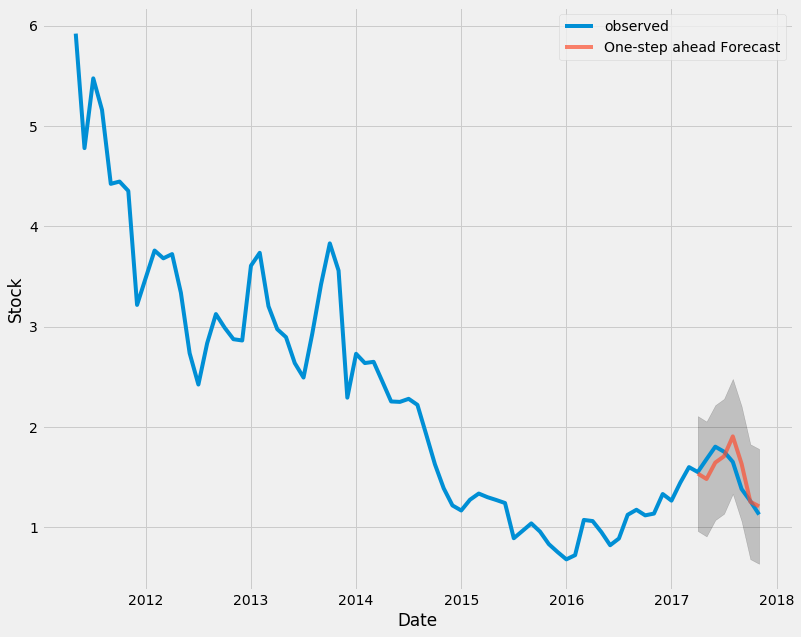

In [248]:
ax = y['2005-02-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Stock')
plt.legend()

plt.show()

In [249]:
y_forecasted = pred.predicted_mean
y_truth = y['2010-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
# The Mean Squared Error of our forecasts is 2.08

The Mean Squared Error of our forecasts is 0.03


In [250]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

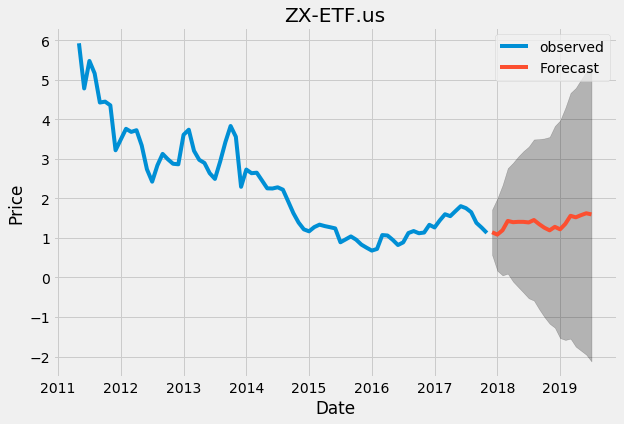

In [252]:
ax = y.plot(label='observed', figsize=(9, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('ZX-ETF.us')
plt.legend()
plt.show()

In [30]:
y = data
y.head()
# y.index = pd.DatetimeIndex(y.index)
y.describe()

count    1979.000000
mean       53.506263
std         7.376670
min        38.314000
25%        47.089500
50%        54.610000
75%        59.182000
max        69.910000
Name: Close, dtype: float64